In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [21]:
dat_file = np.load('data/student.npz')
A_learn = dat_file['A_learn']
b_learn = dat_file['b_learn']
A_test = dat_file['A_test']
b_test = dat_file['b_test']


m = 395 # number of read examples (total:395)
n = 27 # features
m_learn = 300
x0 = np.zeros(28)
dodes = []
dodes_x = []
test_r = []
i = np.random.randint(28)

# Функции
getG = lambda x,i: 2 * A_learn[i] * (A_learn[i].T @ x - b_learn[i])
fx_final = lambda x:(np.linalg.norm((A_learn@x)-b_learn))**2
fx = lambda x,i:(0.5*(A_learn[i].T@x) - b_learn[i])**2
func_test = lambda x,i:(0.5*(A_test[i].T @ x)-b_test[i])**2
t = 10000
L = max(np.linalg.eigh(A_learn.T @ A_learn)[0])


In [63]:
np.shape(A_learn[i])

(28,)

[-0.49155664 -1.92663478 -2.51090235 -0.4802768   0.53687619  1.08085264
 -0.61453517 -1.26257673  0.7213485   0.17062011 -0.66902519 -0.69646162
  0.8205279  -0.19291413 -0.29287742 -1.34149508 -0.5527136   1.48107061
  0.05187559  0.12980002 -0.14993369 -1.17078879 -0.24888537  0.58311113
 -0.47259481 -0.21381316  2.61069499  5.8088441 ]


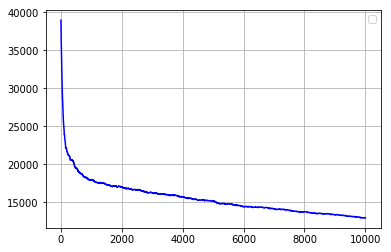

In [29]:
def sgd(fx, getG, L, t, n, x0, fx_final):
    dodes = []
    x = x0
    #sum_x = sum([np.linalg.norm(A_learn[i] - sum(A_learn[i])/n)**2 for i in range(n)])
    x_avg = x0
    for j in range (t):
        i = np.random.randint(n)
        #h = min((1 / n * sum_x)**0.5 / j , 1 / L)
        h = 1 / L
        gfx = getG(x,i)
        x = x - h * gfx
        x_avg = (x_avg * j + x) / (j + 1) 
        fx_in = fx(x, i)
        dodes.append(fx_final(x))
    return x, dodes

def show(data, namefile, legends=[],  colors=[], title="", xlabel="", ylabel=""):
    plt.figure()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    colors = iter(colors if colors else ["b", "g", "r", "go:"])
    plt.legend(tuple([plt.plot(el, next(colors)) for el in data]), tuple(legends), loc = 'best')
    plt.grid()
    plt.savefig(f'{namefile}.png', format = 'png')

dodes_x = []
test_r = []
z, dodes = sgd(fx, getG, L, t, n, x0, fx_final)
print(z)
show([dodes], namefile="graph")
